In [125]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import h5py
import matplotlib.cm as cm
import matplotlib.colors as mcolors
%matplotlib widget

In [126]:
# Load Exp Data
def load_ExpData(file_, idx_str_):
    # Open hdf5 file
    with h5py.File(file_, "r") as dataset:
        # Data
        return dict(
            freq_comb=np.asarray(dataset[idx_str_]["freq_comb"]),
            df=np.asarray(dataset[idx_str_]["df"]),
            USB=np.asarray(dataset[idx_str_]["USB"]),
            DCB=np.asarray(dataset[idx_str_]["DC_Bias"]),
            Pump_Amps=np.asarray(dataset[idx_str_]["Pump_Amplitudes"])
            )

In [127]:
from json import load


folder = "/home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/I:/LKiPA-Data/2025-12/Resonance Pump Power Sweep"

# Get all HDF5 files in the folder
files = glob.glob(os.path.join(folder, "*.hdf5"))

# Pick the most recently modified one
file = max(files, key=os.path.getmtime)

print("Selected file:", file)

# Extract the run name automatically
run = os.path.basename(file).replace(".hdf5", "")
print("Run:", run)

resonance= load_ExpData(
    file_ = file,
    idx_str_= run
    )['USB']
resonance=np.array(resonance)

freqs = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']

df = load_ExpData(
    file_ = file,
    idx_str_= run
    )['df'] / 1e6

DC_Bias = load_ExpData(
    file_ = file,
    idx_str_= run
    )['DCB']

pump_Amps = load_ExpData(
    file_ = file,
    idx_str_= run
    )['Pump_Amps']
pump_Amps = np.array(pump_Amps)
print(pump_Amps)


Selected file: /home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/I:/LKiPA-Data/2025-12/Resonance Pump Power Sweep/2025-12-16_18_11_55.hdf5
Run: 2025-12-16_18_11_55
[0.   0.05 0.1  0.2  0.4  0.6  0.8 ]


In [128]:

freq_comb = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']


freq_centre = freq_comb[len(freq_comb)//2]
print('Frequency Centre = ', freq_centre)

Frequency Centre =  4400000000.0


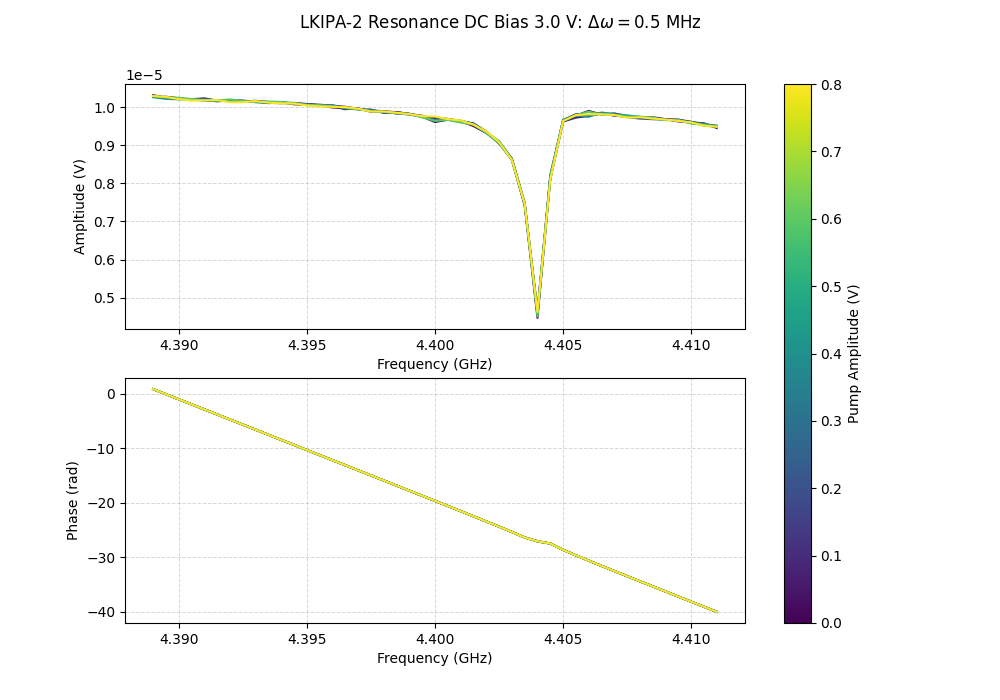

In [129]:
fig, ax = plt.subplots(nrows= 2, figsize=(10, 7))

# Colormap and normalization
cmap = cm.viridis
norm = mcolors.Normalize(vmin=pump_Amps[0], vmax=pump_Amps[-1])

# Data
for idx in range(np.shape(resonance)[0]):
    colors = cmap(norm(pump_Amps[idx]))
    ax[0].plot(
        freqs/1e9, 
        np.abs(resonance[idx]), 
        label= '$A_{sig} = $ ' + str(np.round(pump_Amps[idx], 2)) + 'V',
        color = colors
        )
    ax[1].plot(
        freqs/1e9, 
        np.unwrap(np.angle(resonance[idx])), 
        label= '$pump_{sig} = $ ' + str(np.round(pump_Amps[idx], 2)) + 'V',
        color = colors
        )

# Grid and labels
ax[0].grid(ls='--', lw=0.7, alpha=0.5)
ax[1].grid(ls='--', lw=0.7, alpha=0.5)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Ampltiude (V)')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Phase (rad)')

# plot limits
#ax[0].set_xlim(freq_centre/1e9, np.max(freqs)/1e9)
#ax[1].set_xlim(freq_centre/1e9, np.max(freqs)/1e9)


# --- ADD COLORBAR ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])   # required for older matplotlib versions
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Pump Amplitude (V)")



fig.suptitle(
    f'LKIPA-2 Resonance DC Bias 3.0 V: $\\Delta \\omega = ${df} MHz'
    ) 
# Save plot
#fig.savefig(f"Figures/LKIPA_Res_{df}_DCB_4_sig_0.3.png", dpi=300, bbox_inches="tight")
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 1

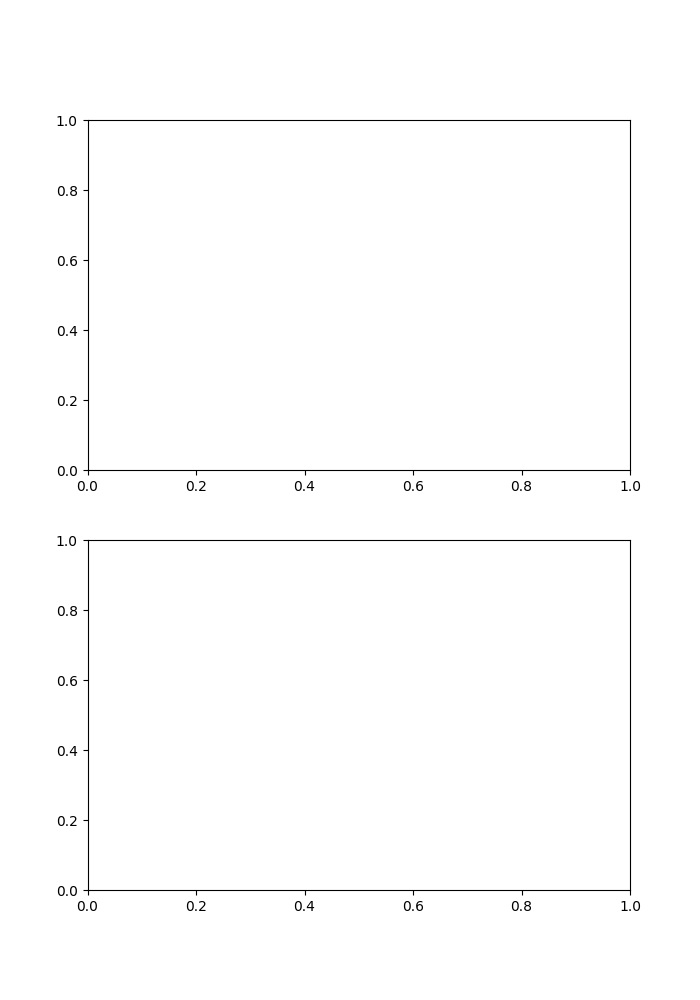

In [130]:
fig, ax = plt.subplots(nrows= 2, figsize=(7, 10))

# Colormap and normalization
cmap = cm.viridis
norm = mcolors.Normalize(vmin=DC_Bias[0], vmax=DC_Bias[-1])

# Data
idx =4
colors = cmap(norm(DC_Bias[idx]))
ax[0].plot(
    freqs/1e9, 
    np.abs(resonance[idx]), 
    label= '$A_{sig} = $ ' + str(np.round(DC_Bias[idx], 2)) + 'V',
    color = colors
    )
ax[1].plot(
    freqs/1e9, 
    np.unwrap(np.angle(resonance[idx])), 
    label= '$A_{sig} = $ ' + str(np.round(DC_Bias[idx], 2)) + 'V',
    color = colors
    )

# Grid and labels
ax[0].grid(ls='--', lw=0.7, alpha=0.5)
ax[1].grid(ls='--', lw=0.7, alpha=0.5)
ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_ylabel('Ampltiude (V)')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Phase (rad)')

# plot limits
ax[0].set_xlim((np.min(freqs)/1e9, np.max(freqs)/1e9))
ax[1].set_xlim((np.min(freqs)/1e9, np.max(freqs)/1e9))


# --- ADD COLORBAR ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])   # required for older matplotlib versions
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("DC Bias (V)")

# Title
fig.suptitle(
    f'LKIPA Resonance DC Bias Sweep: $\\Delta \\omega = ${df} MHz'
    ) 

plt.show()